## Exercises #1

1. Describe the null hypotheses to which the p-values given in Table 3.4
   
correspond. Explain what conclusions you can draw based on these

p-values. Your explanation should be phrased in terms of sales, TV,

radio, and newspaper, rather than in terms of the coefficients of the

linear model.

In [6]:
# 유의수준 0.05하에서 TV와 라디오 광고는 매출을 높이는 데 효과가 있지만, 신문 광고는 p-value가 0.8599로 효과가 없다고 결론지을 수 있음

## Exercises #5

5. Consider the fitted values that result from performing linear regression
   
without an intercept. In this setting, the ith fitted value takes

the form

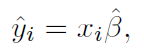

where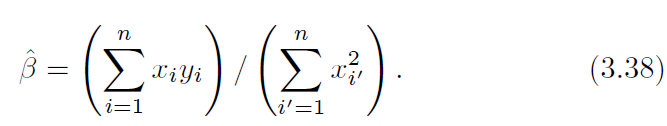

Show that we can write
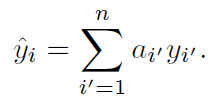


What is ai! ?

Note: We interpret this result by saying that the fitted values from

linear regression are linear combinations of the response values.

In [7]:
# 예측값 hat_yi는 모든 yi'들의 선형 결합이며, 각 yi'에 곱해지는 가중치 ai'는 xi와 xi'의 곱에 비례

## Exercises #14

14. This problem focuses on the collinearity problem.
    
(a) Perform the following commands in Python:

rng = np.random.default_rng (10)

x1 = rng.uniform(0, 1, size=100)

x2 = 0.5 * x1 + rng.normal(size=100) / 10

y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is

a function of x1 and x2. Write out the form of the linear model.

What are the regression coefficients?

In [8]:
# 절편 b0 : 2, 기울기1 b1 : 2, 기울기2 b2 : 0.3

In [ ]:
(b) What is the correlation between x1 and x2? Create a scatterplot

displaying the relationship between the variables.

Corr. between x1 and x2: 0.772324497691354


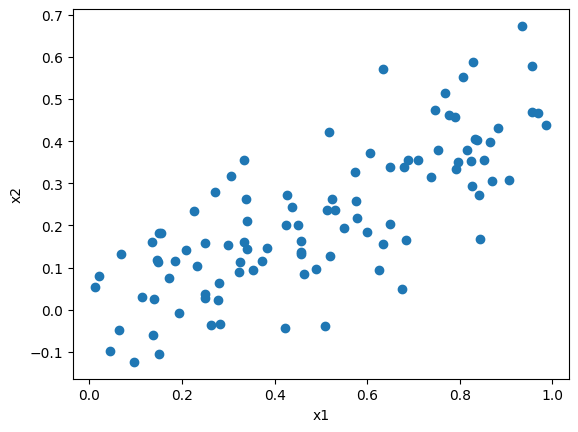

In [10]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

correlation = np.corrcoef(x1, x2)[0, 1]
print("Corr. between x1 and x2:", correlation)

# 산점도 그리기
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [11]:
# r=0.77로, 양의 상관이 존재. 즉, x1이 증가하면 대체로 x2도 증가

(c) Using this data, fit a least squares regression to predict y using

x1 and x2. Describe the results obtained. What are ˆ #0, ˆ #1, and

ˆ #2? How do these relate to the true #0, #1, and #2? Can you

reject the null hypothesis H0 : #1 = 0? How about the null

hypothesis H0 : #2 = 0?

In [13]:
import statsmodels.api as sm

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           5.76e-08
Time:                        21:08:50   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [14]:
# 절편 b0 : 1.9579, 기울기1 b1 : 1.6154, 기울기2 b2 : 0.9428
# 실제 값과 비교 : b0는 거의 일치, b1은 약간 낮음, b2는 훨씬 높음. 이 차이는 x1과 x2의 상관관계 때문일 수 있음

# H0: b2=0 
# p-value가 0.259로, 유의수준 0.05하에서 귀무가설을 기각할 수 없음

(d) Now fit a least squares regression to predict y using only x1.

Comment on your results. Can you reject the null hypothesis

H0 : #1 = 0?

In [15]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
y = 2 + 2 * x1 + rng.normal(size=100)

X = sm.add_constant(x1)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.74
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           9.86e-06
Time:                        21:18:24   Log-Likelihood:                -150.64
No. Observations:                 100   AIC:                             305.3
Df Residuals:                      98   BIC:                             310.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7792      0.230      7.751      0.0

In [16]:
# 유의수준 0.05하에서 귀무가설 b1=0을 기각할 수 있음. 즉, x1은 y와 유의미함

(e) Now fit a least squares regression to predict y using only x2.

Comment on your results. Can you reject the null hypothesis

H0 : #1 = 0?

In [17]:
rng = np.random.default_rng(10)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 0.3 * x2 + rng.normal(size=100)

X = sm.add_constant(x2)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1495
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.700
Time:                        21:20:32   Log-Likelihood:                -148.80
No. Observations:                 100   AIC:                             301.6
Df Residuals:                      98   BIC:                             306.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8447      0.205      9.018      0.0

In [18]:
# 유의수준 0.05하에서 귀무가설 b1=0을 기각할 수 없음. 즉, x2는 y와 유의하지 않음

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

In [19]:
# 서로 모순되지 않고 일관된 해석을 나타냄

(g) Suppose we obtain one additional observation, which was unfortunately

mismeasured. We use the function np.concatenate() to np.concaadd

this additional observation to each of x1, x2 and y. tenate()

x1 = np.concatenate([x1, [0.1]])

x2 = np.concatenate([x2, [0.8]])

y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What

effect does this new observation have on the each of the models?

In each model, is this observation an outlier? A high-leverage

point? Both? Explain your answers.

In [22]:
# (c)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# add anomaly
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.33
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.10e-08
Time:                        21:30:14   Log-Likelihood:                -148.20
No. Observations:                 101   AIC:                             302.4
Df Residuals:                      98   BIC:                             310.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0759      0.200     10.367      0.0

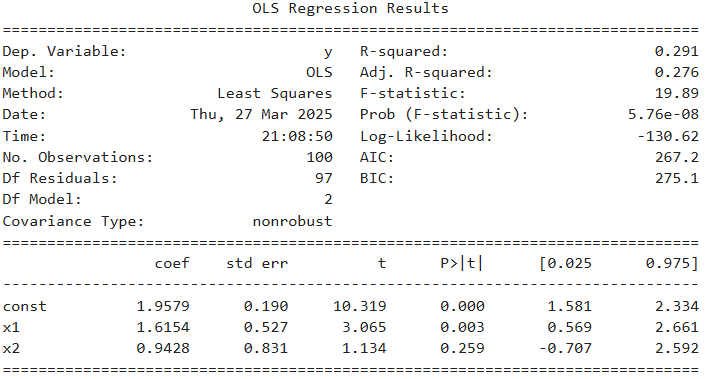

In [21]:
# 추가 관측값 하나가 전체 모델에 눈에 띄는 영향을 미쳤음. x2의 계수가 약 0.94 → 1.86으로 크게 증가하고,
# → p-value가 0.259 → 0.046로 유의하게 바뀜. 이 점은 이상치이자 고레버리지 점, 특히 x2의 효과를 부풀려 보여주고 있음

In [23]:
# (d)
x1 = rng.uniform(0, 1, size=100)
y = 2 + 2 * x1 + rng.normal(size=100)

# add anomaly
x1 = np.concatenate([x1, [0.1]])
y = np.concatenate([y, [6]])

X = sm.add_constant(x1)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     18.83
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.45e-05
Time:                        21:31:09   Log-Likelihood:                -147.05
No. Observations:                 101   AIC:                             298.1
Df Residuals:                      99   BIC:                             303.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2645      0.195     11.622      0.0

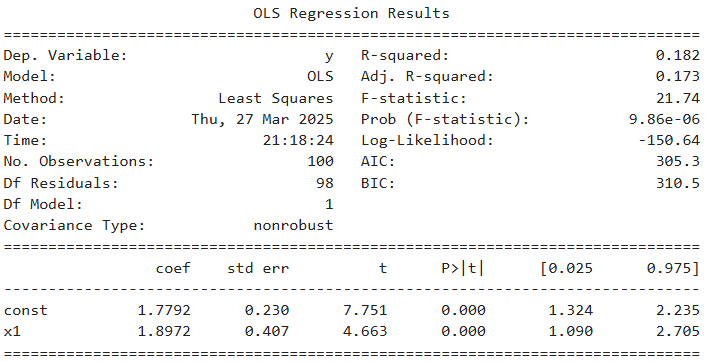

In [24]:
# 오류가 있는 새로운 관측값이 전체 회귀선의 절편(절편 ↑)과 기울기(기울기 ↓)를 바꿈
# x1은 여전히 유의미하지만, 모델은 왜곡됨. 이 점은 회귀선에 큰 영향을 주는 이상치이자 고레버리지 점

In [26]:
# (c)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# add anomaly
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = sm.add_constant(x2)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     34.34
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           6.09e-08
Time:                        21:33:58   Log-Likelihood:                -157.76
No. Observations:                 101   AIC:                             319.5
Df Residuals:                      99   BIC:                             324.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1747      0.182     11.926      0.0

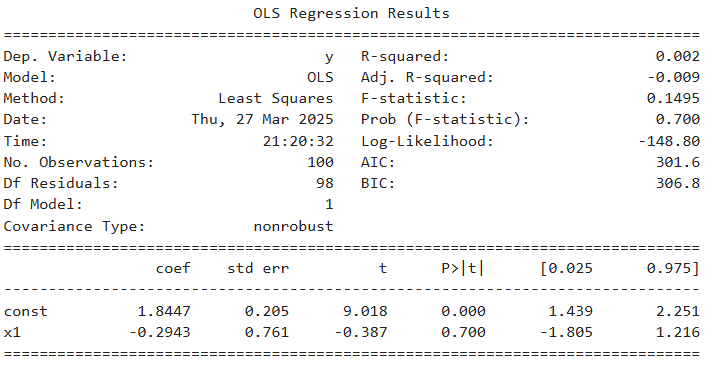

In [27]:
# (e)에서 x2는 유의하지 않았지만, 이상치 하나가 추가되자 x2가 매우 유의한 변수처럼 보이게 됨
# 그러나 이는 실제 관계가 아니라 이상치에 의한 왜곡. 이 점은 회귀선에 큰 영향을 주는 이상치이자 고레버리지 점

## Exercises #15

15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.
(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

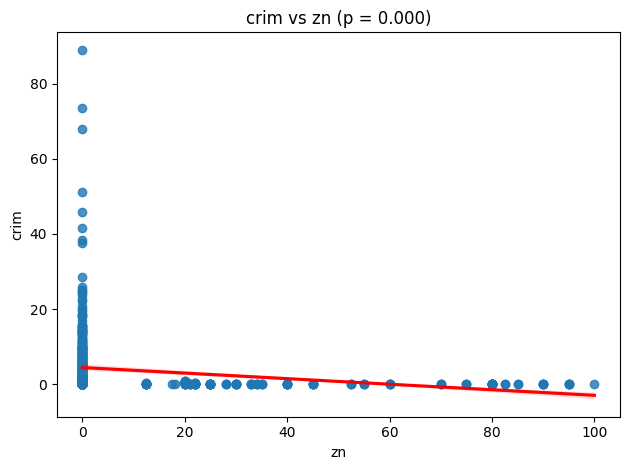

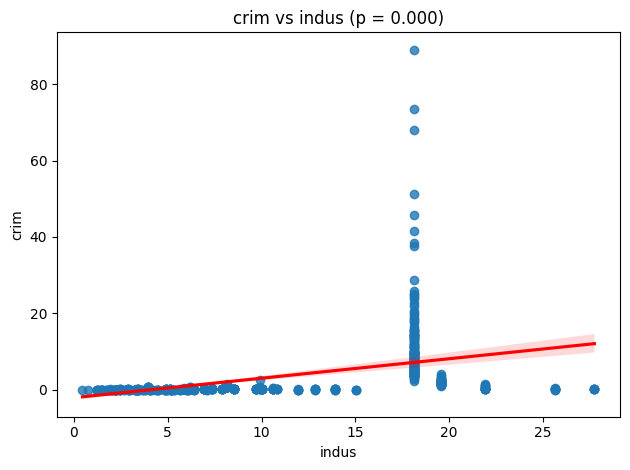

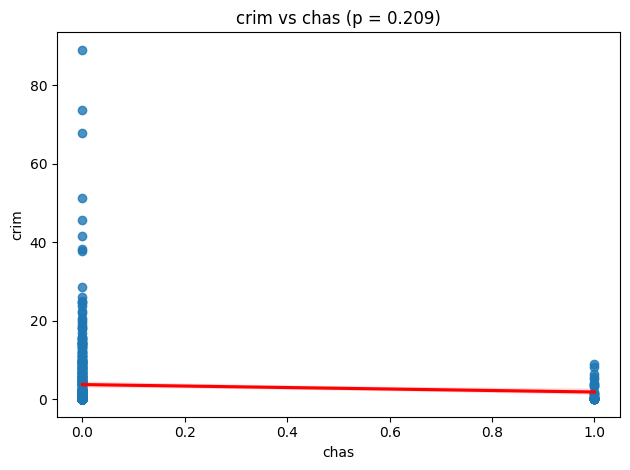

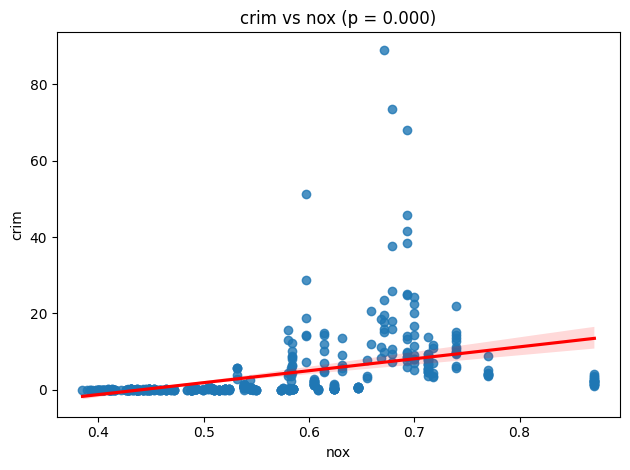

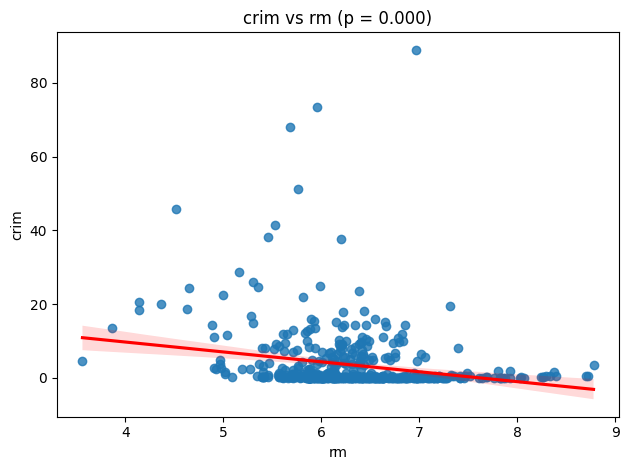

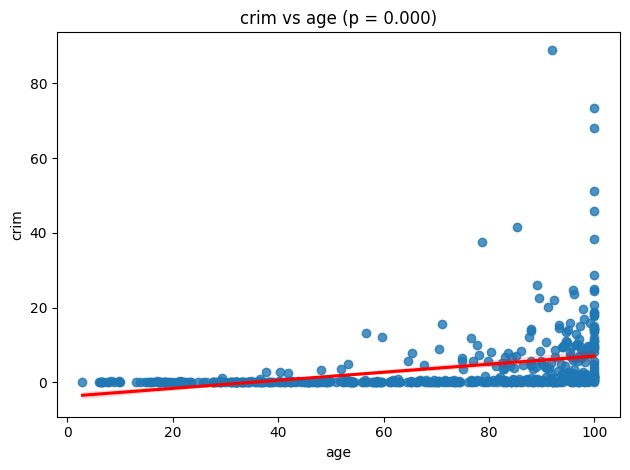

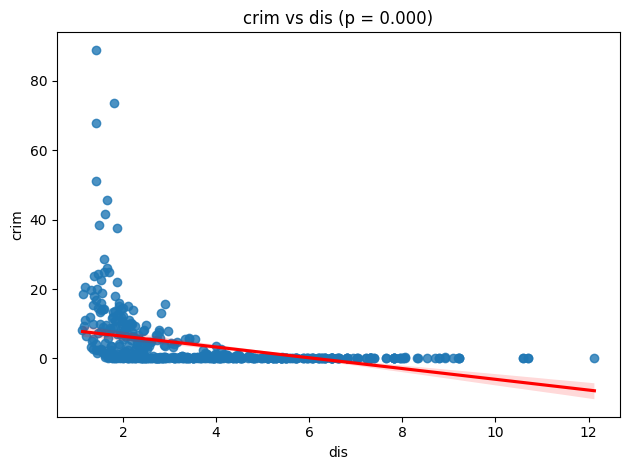

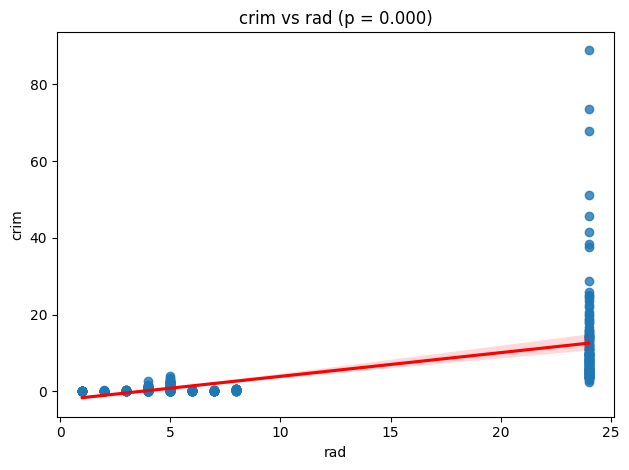

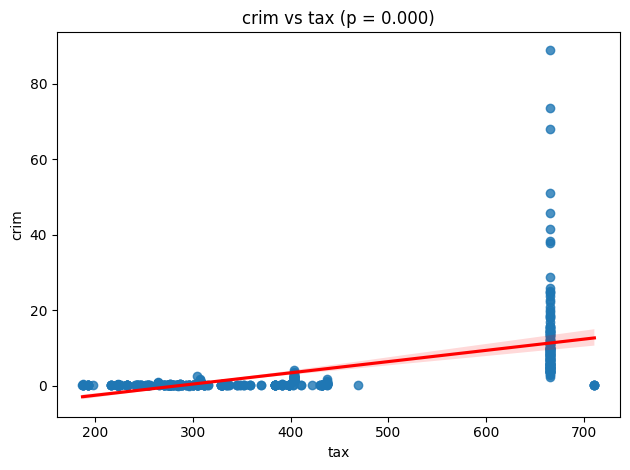

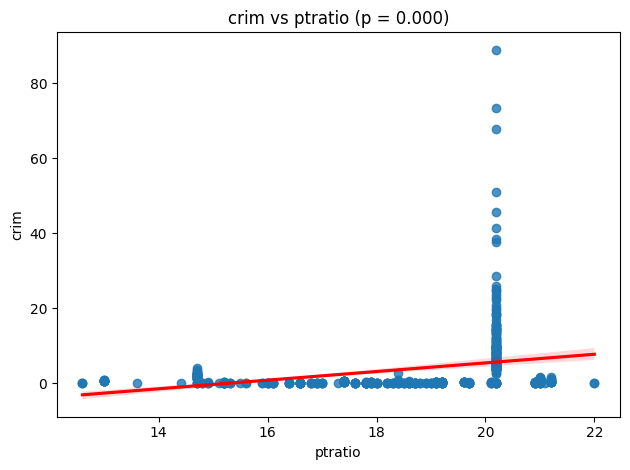

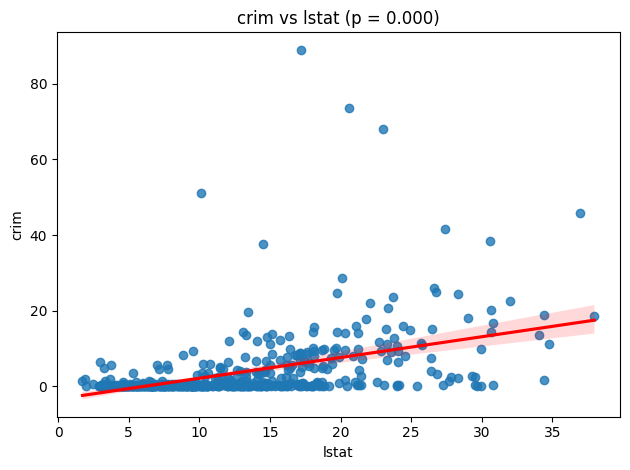

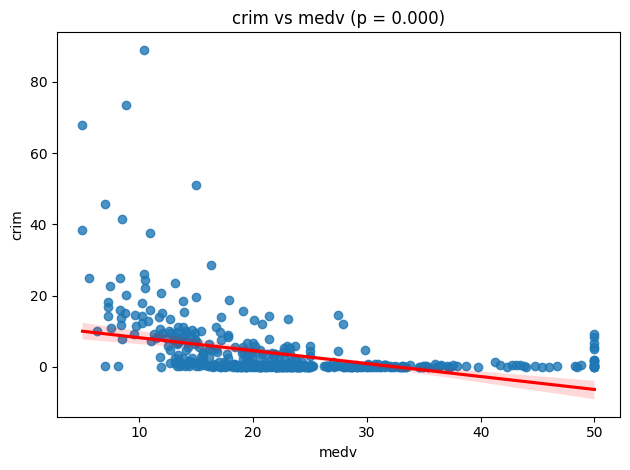

   Predictor       p-value  R-squared       coef
7        rad  2.693844e-56   0.391257   0.617911
8        tax  2.357127e-47   0.339614   0.029742
10     lstat  2.654277e-27   0.207591   0.548805
3        nox  3.751739e-23   0.177217  31.248531
1      indus  1.450349e-21   0.165310   0.509776
11      medv  1.173987e-19   0.150780  -0.363160
6        dis  8.519949e-19   0.144149  -1.550902
5        age  2.854869e-16   0.124421   0.107786
9    ptratio  2.942922e-11   0.084068   1.151983
4         rm  6.346703e-07   0.048069  -2.684051
0         zn  5.506472e-06   0.040188  -0.073935
2       chas  2.094345e-01   0.003124  -1.892777


In [36]:
import seaborn as sns
import pandas as pd
from ISLP import load_data

df = load_data('Boston')

results = []

for col in df.columns:
    if col == 'crim':
        continue
    X = sm.add_constant(df[col])
    y = df['crim']
    model = sm.OLS(y, X).fit()
    
    results.append({
        'Predictor': col,
        'p-value': model.pvalues[col],
        'R-squared': model.rsquared,
        'coef': model.params[col]
    })
    
    sns.regplot(x=col, y='crim', data=df, line_kws={"color": "red"})
    plt.title(f'crim vs {col} (p = {model.pvalues[col]:.3f})')
    plt.xlabel(col)
    plt.ylabel('crim')
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results).sort_values(by='p-value')
print(results_df)

In [37]:
# 유의수준 0.05하에서 chas를 제외한 나머지는 모두 유의미한 관계로 존재

(b) Fit a multiple regression model to predict the response using

all of the predictors. Describe your results. For which predictors

can we reject the null hypothesis H0 : #j = 0?

In [39]:
y = df['crim']

X = df.drop(columns='crim')
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.03e-56
Time:                        21:46:38   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

In [40]:
# zn, dis, rad, medv는 유의수준 0.05하에서 귀무가설 bj = 0을 기각. 즉, 유의미
# indus, chas, nox, rm, age, tax, ptratio, lstat는 유의수준 0.05하에서 귀무가설 bj = 0을 기각할 수 없음. 즉, 무의미

(c) How do your results from (a) compare to your results from (b)?

Create a plot displaying the univariate regression coefficients

from (a) on the x-axis, and the multiple regression coefficients

from (b) on the y-axis. That is, each predictor is displayed as a

single point in the plot. Its coefficient in a simple linear regression

model is shown on the x-axis, and its coefficient estimate

in the multiple linear regression model is shown on the y-axis.

| x | 단순 회귀 계수 | 다중 회귀 계수 |
| --- | --- | --- |
| zn | -0.0739 | 0.0457 |
| indus | 0.5098 | -0.0584 |
| chas | -1.8928 | -0.8254 |
| nox | 31.2485 | -9.9576 |
| rm | -2.6841 | 0.6289 |
| age | 0.1078 | -0.0008 |
| dis | -1.5509 | -1.0122 |
| rad | 0.6179 | 0.6125 |
| tax | 0.0297 | -0.0038 |
| ptratio | 1.1520 | -0.3041 |
| lstat | 0.5488 | 0.1388 |
| medv | -0.3632 | -0.2201 |

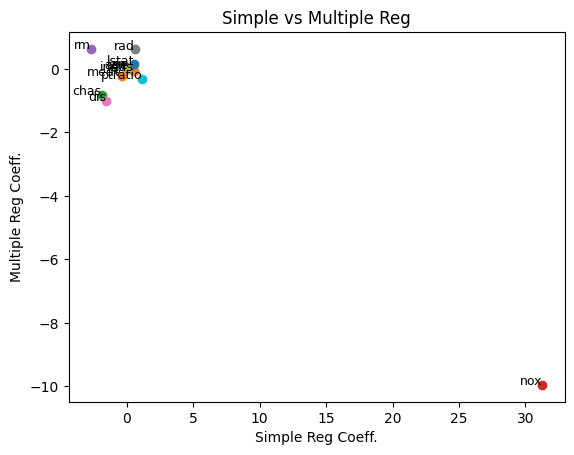

In [44]:
simple_coefs = {
    'zn': -0.0739, 'indus': 0.5098, 'chas': -1.8928, 'nox': 31.2485,
    'rm': -2.6841, 'age': 0.1078, 'dis': -1.5509, 'rad': 0.6179,
    'tax': 0.0297, 'ptratio': 1.1520, 'lstat': 0.5488, 'medv': -0.3632
}

multiple_coefs = {
    'zn': 0.0457, 'indus': -0.0584, 'chas': -0.8254, 'nox': -9.9576,
    'rm': 0.6289, 'age': -0.0008, 'dis': -1.0122, 'rad': 0.6125,
    'tax': -0.0038, 'ptratio': -0.3041, 'lstat': 0.1388, 'medv': -0.2201
}

for var in simple_coefs:
    plt.scatter(simple_coefs[var], multiple_coefs[var])
    plt.text(simple_coefs[var], multiple_coefs[var], var, fontsize=9, ha='right')

plt.xlabel('Simple Reg Coeff.')
plt.ylabel('Multiple Reg Coeff.')
plt.title('Simple vs Multiple Reg')
plt.show()

In [45]:
# 단순 회귀 결과와 다중 회귀 결과는 다를 수 있으며, 이 차이는 주로 변수들 사이의 공선성으로 발생

(d) Is there evidence of non-linear association between any of the

predictors and the response? To answer this question, for each

predictor X, fit a model of the form

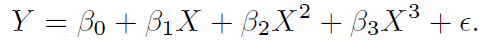

In [51]:
def format_p(p):
    if p < 0.0001:
        return "< 0.0001"
    elif p < 0.001:
        return "< 0.001"
    else:
        return f"{p:.4f}"

In [55]:
results = []

for col in df.columns:
    if col == 'crim':
        continue
    
    X = df[[col]].copy()
    X[col + '_2'] = X[col] ** 2
    X[col + '_3'] = X[col] ** 3
    X = sm.add_constant(X)

    y = df['crim']
    model = sm.OLS(y, X).fit()

    results.append({
        'predictor': col,
        'p_X^2': model.pvalues.get(col + '_2', np.nan),
        'f(p_X^2)': format_p(model.pvalues.get(col + '_2', np.nan)),
        'p_X^3': model.pvalues.get(col + '_3', np.nan),
        'f(p_X^3)': format_p(model.pvalues.get(col + '_3', np.nan))
    })

results_df = pd.DataFrame(results).sort_values(by='p_X^2')
print(results_df)

   predictor         p_X^2  f(p_X^2)         p_X^3  f(p_X^3)
11      medv  3.260523e-18  < 0.0001  1.046510e-12  < 0.0001
3        nox  6.811300e-15  < 0.0001  6.961110e-16  < 0.0001
6        dis  4.941214e-12  < 0.0001  1.088832e-08  < 0.0001
1      indus  3.420187e-10  < 0.0001  1.196405e-12  < 0.0001
9    ptratio  4.119552e-03    0.0041  6.300514e-03    0.0063
5        age  4.737733e-02    0.0474  6.679915e-03    0.0067
10     lstat  6.458736e-02    0.0646  1.298906e-01    0.1299
0         zn  9.375050e-02    0.0938  2.295386e-01    0.2295
8        tax  1.374682e-01    0.1375  2.438507e-01    0.2439
2       chas  2.094345e-01    0.2094  2.094345e-01    0.2094
4         rm  3.641094e-01    0.3641  5.085751e-01    0.5086
7        rad  6.130099e-01    0.6130  4.823138e-01    0.4823


In [56]:
# b2, b3의 p-value가 작다면 비선형 관계 있다고 해석할 수 있음
# medv, nox, dis, indus, ptratio, age는 유의수준 0.05하에서 p-value가 작으므로 비선형 관계가 존재
# lstat, zn, tax, chas, rm, rad는 유의수준 0.05하에서 p-value가 크므로 비선형 관계가 약하거나 없다고 해석할 수 있음